## Breast Cancer Classification using Neural Network

### Importing neccesary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
breast_cancer_dataset = load_breast_cancer()

In [3]:
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
breast_cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# importing feature data in dataframe

df = pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)

In [7]:
df.head(4)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  

[4 rows x 30 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df['output'] = breast_cancer_dataset.target

In [10]:
df.tail(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  output  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1  

[3 rows x 31 columns]

In [11]:
df.shape

(569, 31)

In [12]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
output                     0
dtype: int64

In [13]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      output  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

1    357
0    212
Name: output, dtype: int64

0=> malignant and 1=> benign


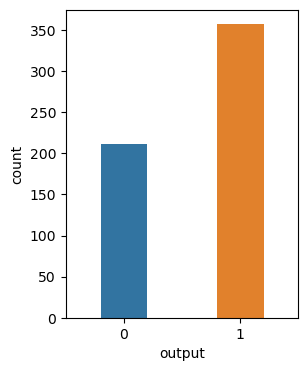

In [14]:
print(df.output.value_counts())
plt.figure(figsize=(3,4))
sns.countplot(data=df,x='output',width=0.4)

print('\n0=> malignant and 1=> benign')

In [15]:
df.groupby('output').mean()

mean radius  mean texture  mean perimeter   mean area  \
output                                                          
0         17.462830     21.604906      115.365377  978.376415   
1         12.146524     17.914762       78.075406  462.790196   

        mean smoothness  mean compactness  mean concavity  \
output                                                      
0              0.102898          0.145188        0.160775   
1              0.092478          0.080085        0.046058   

        mean concave points  mean symmetry  mean fractal dimension  ...  \
output                                                              ...   
0                  0.087990       0.192909                0.062680  ...   
1                  0.025717       0.174186                0.062867  ...   

        worst radius  worst texture  worst perimeter   worst area  \
output                                                              
0          21.134811      29.318208       141.370330  1422.286321   
1          13.379801      23.515070        87.005938   558.899440   

        worst smoothness  worst compactness  worst concavity  \
output                                                         
0               0.144845           0.374824         0.450606   
1               0.124959           0.182673         0.166238   

        worst concave points  worst symmetry  worst fractal dimension  
output                                                                 
0                   0.182237        0.323468                 0.091530  
1                   0.074444        0.270246                 0.079442  

[2 rows x 30 columns]

In [16]:
print(breast_cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Univariate Data Analysis

In [17]:
features = breast_cancer_dataset.feature_names

In [18]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
mean_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']

/tmp/ipykernel_170074/2388646079.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(15,2,cnt)


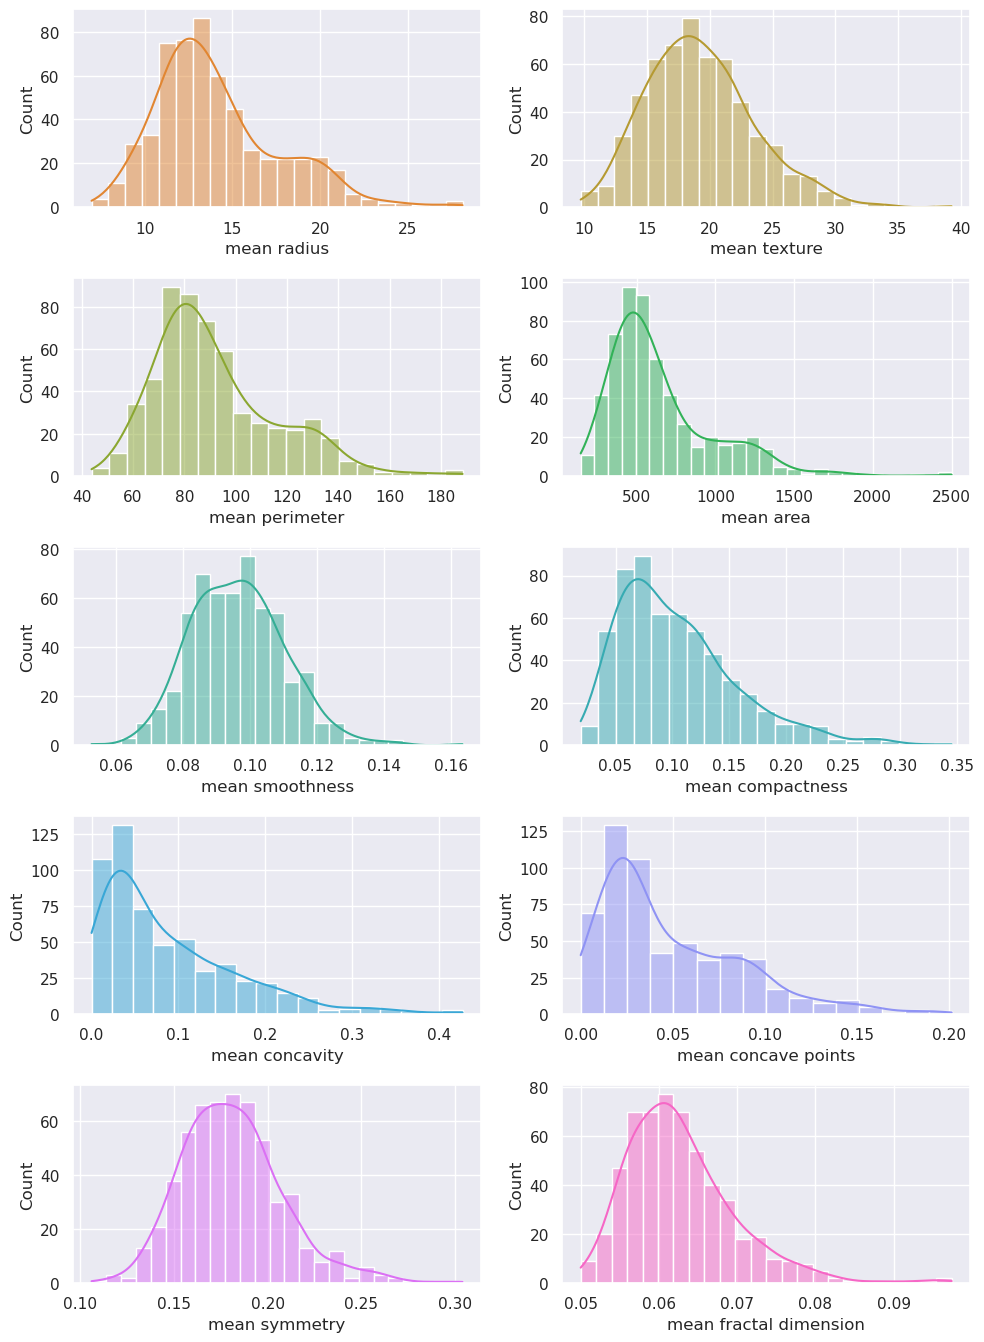

In [20]:
sns.set()
cnt=1
plt.figure(figsize=(10,40))
colors = sns.color_palette('husl',n_colors=11)
plt.title('Statistical Measure')
for feature in mean_features:
    plt.subplot(15,2,cnt)
    sns.histplot(data=df,x=feature,cbar=True,kde=True,color=colors[cnt])
    plt.tight_layout()
    cnt+=1

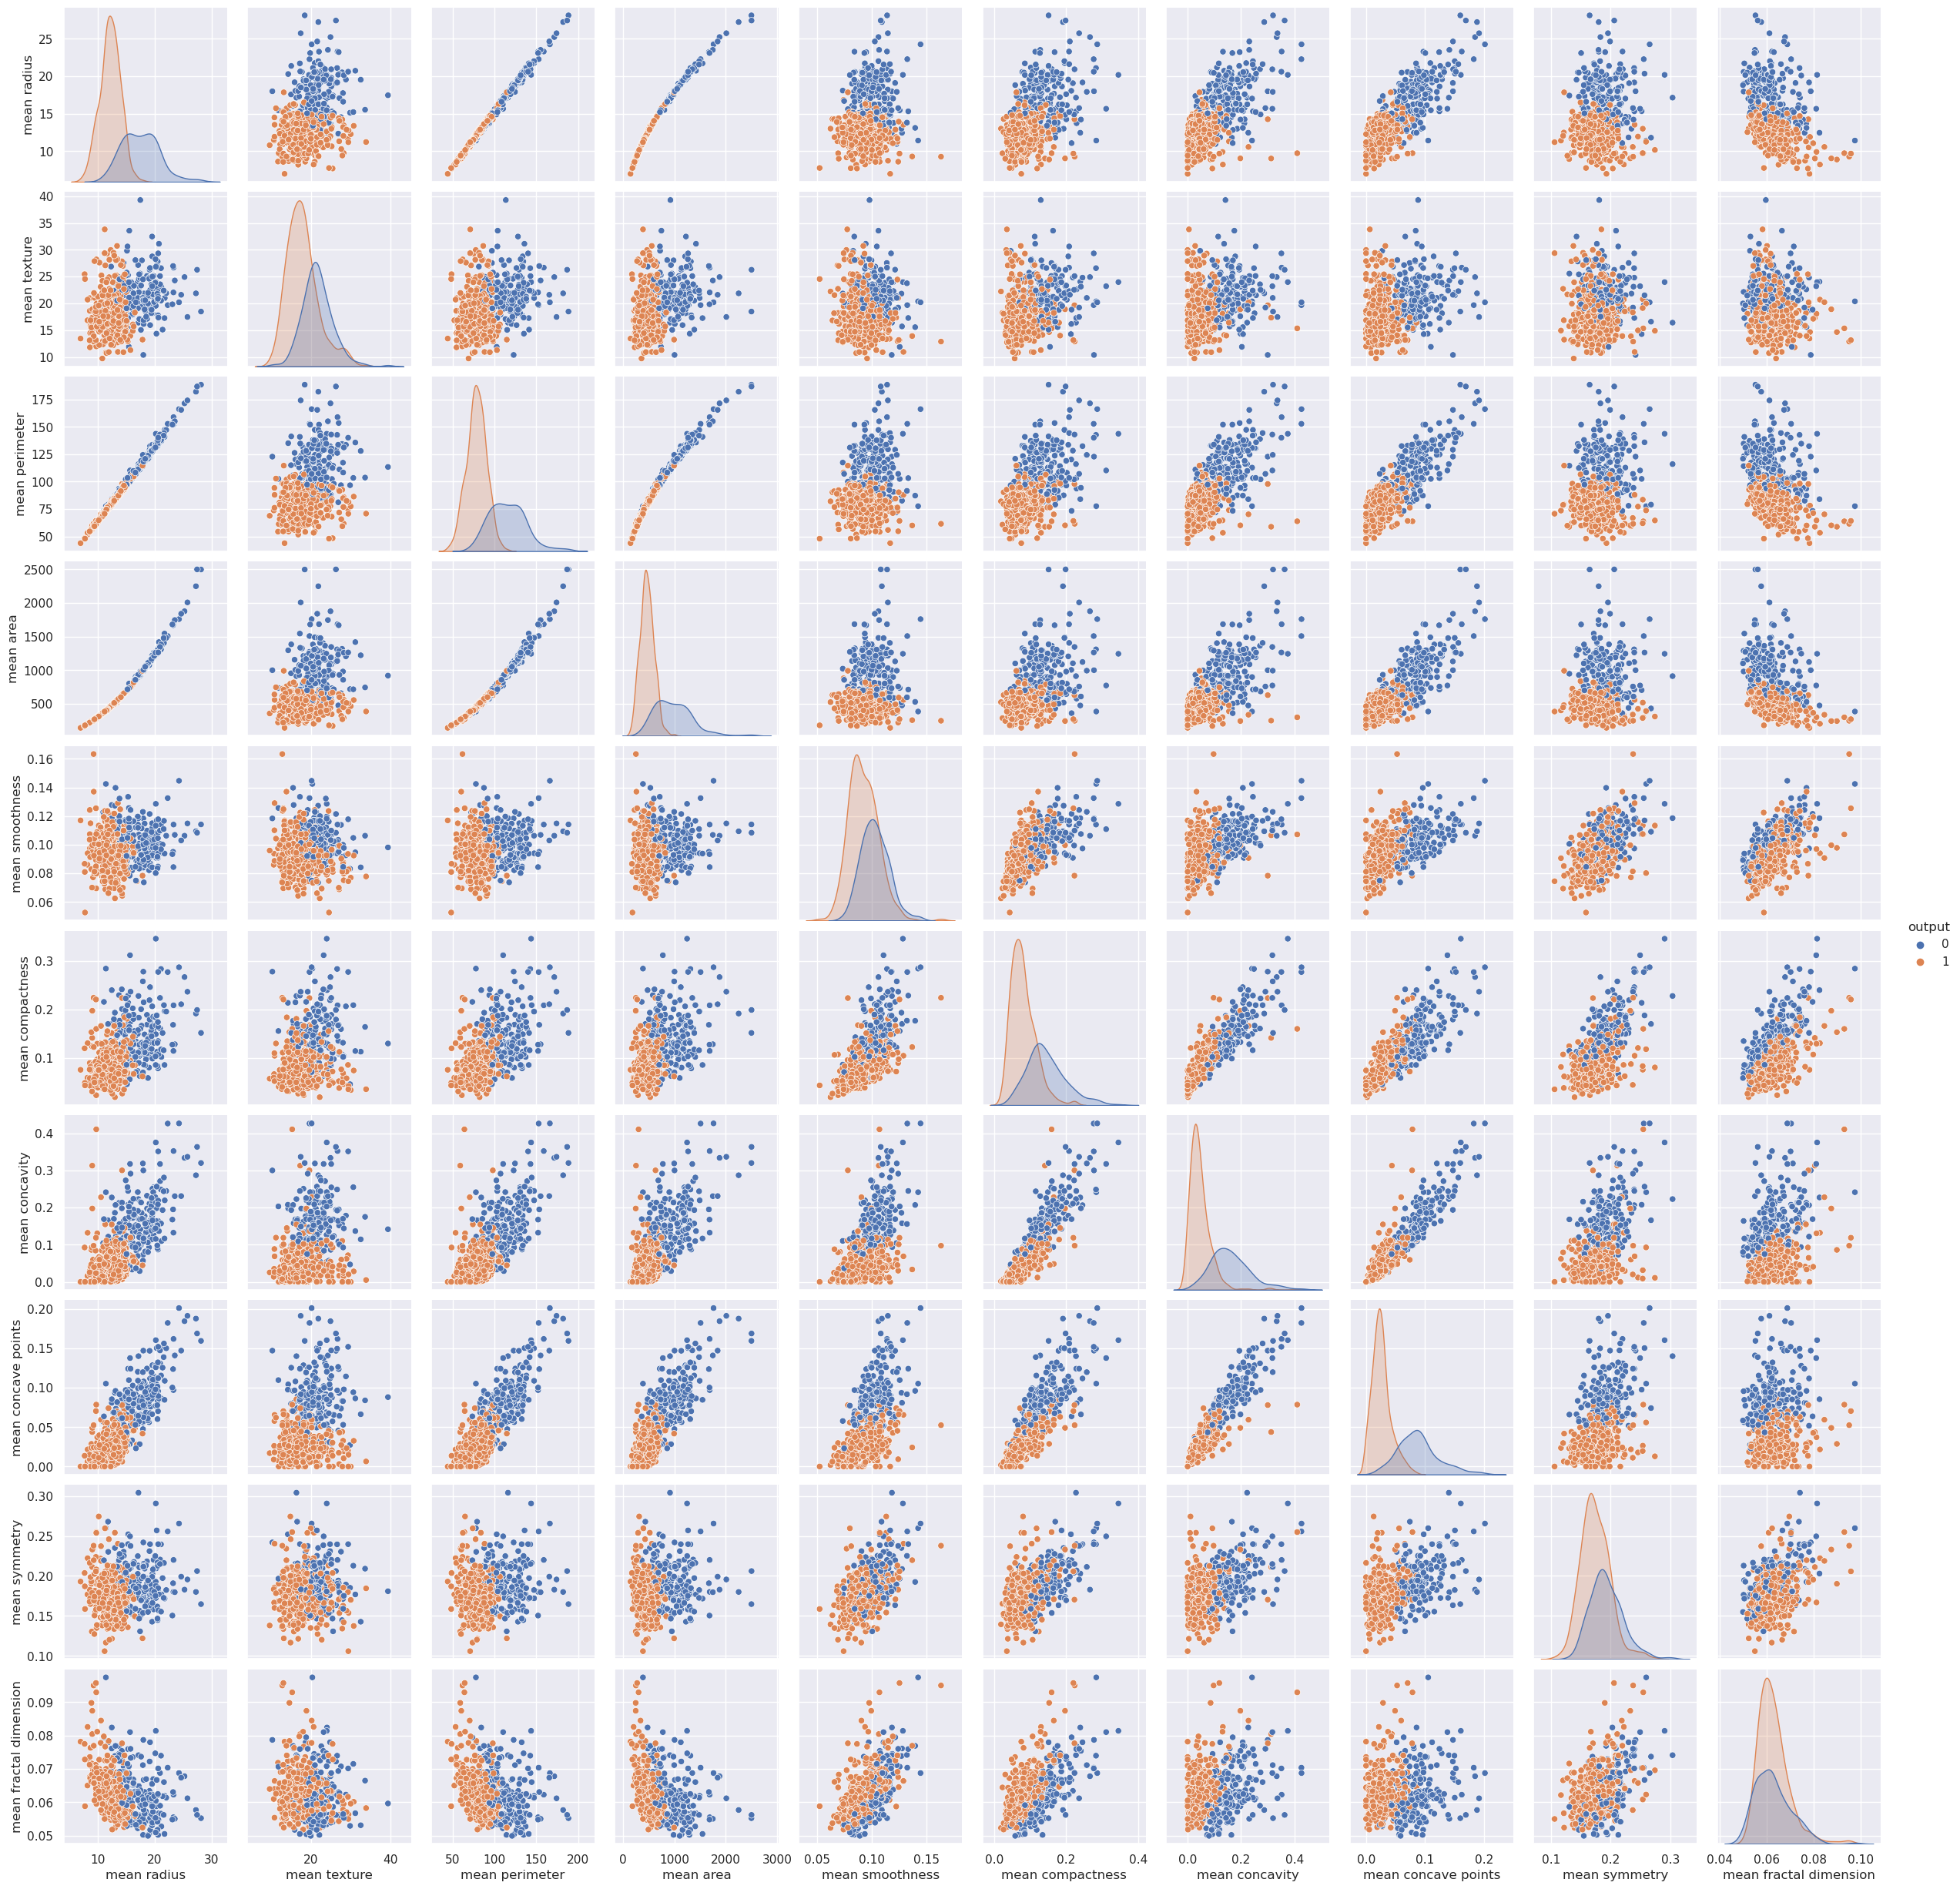

In [21]:
sns.pairplot(data=df,hue='output',vars=mean_features)

Text(278.75, 0.5, 'Actual Value')

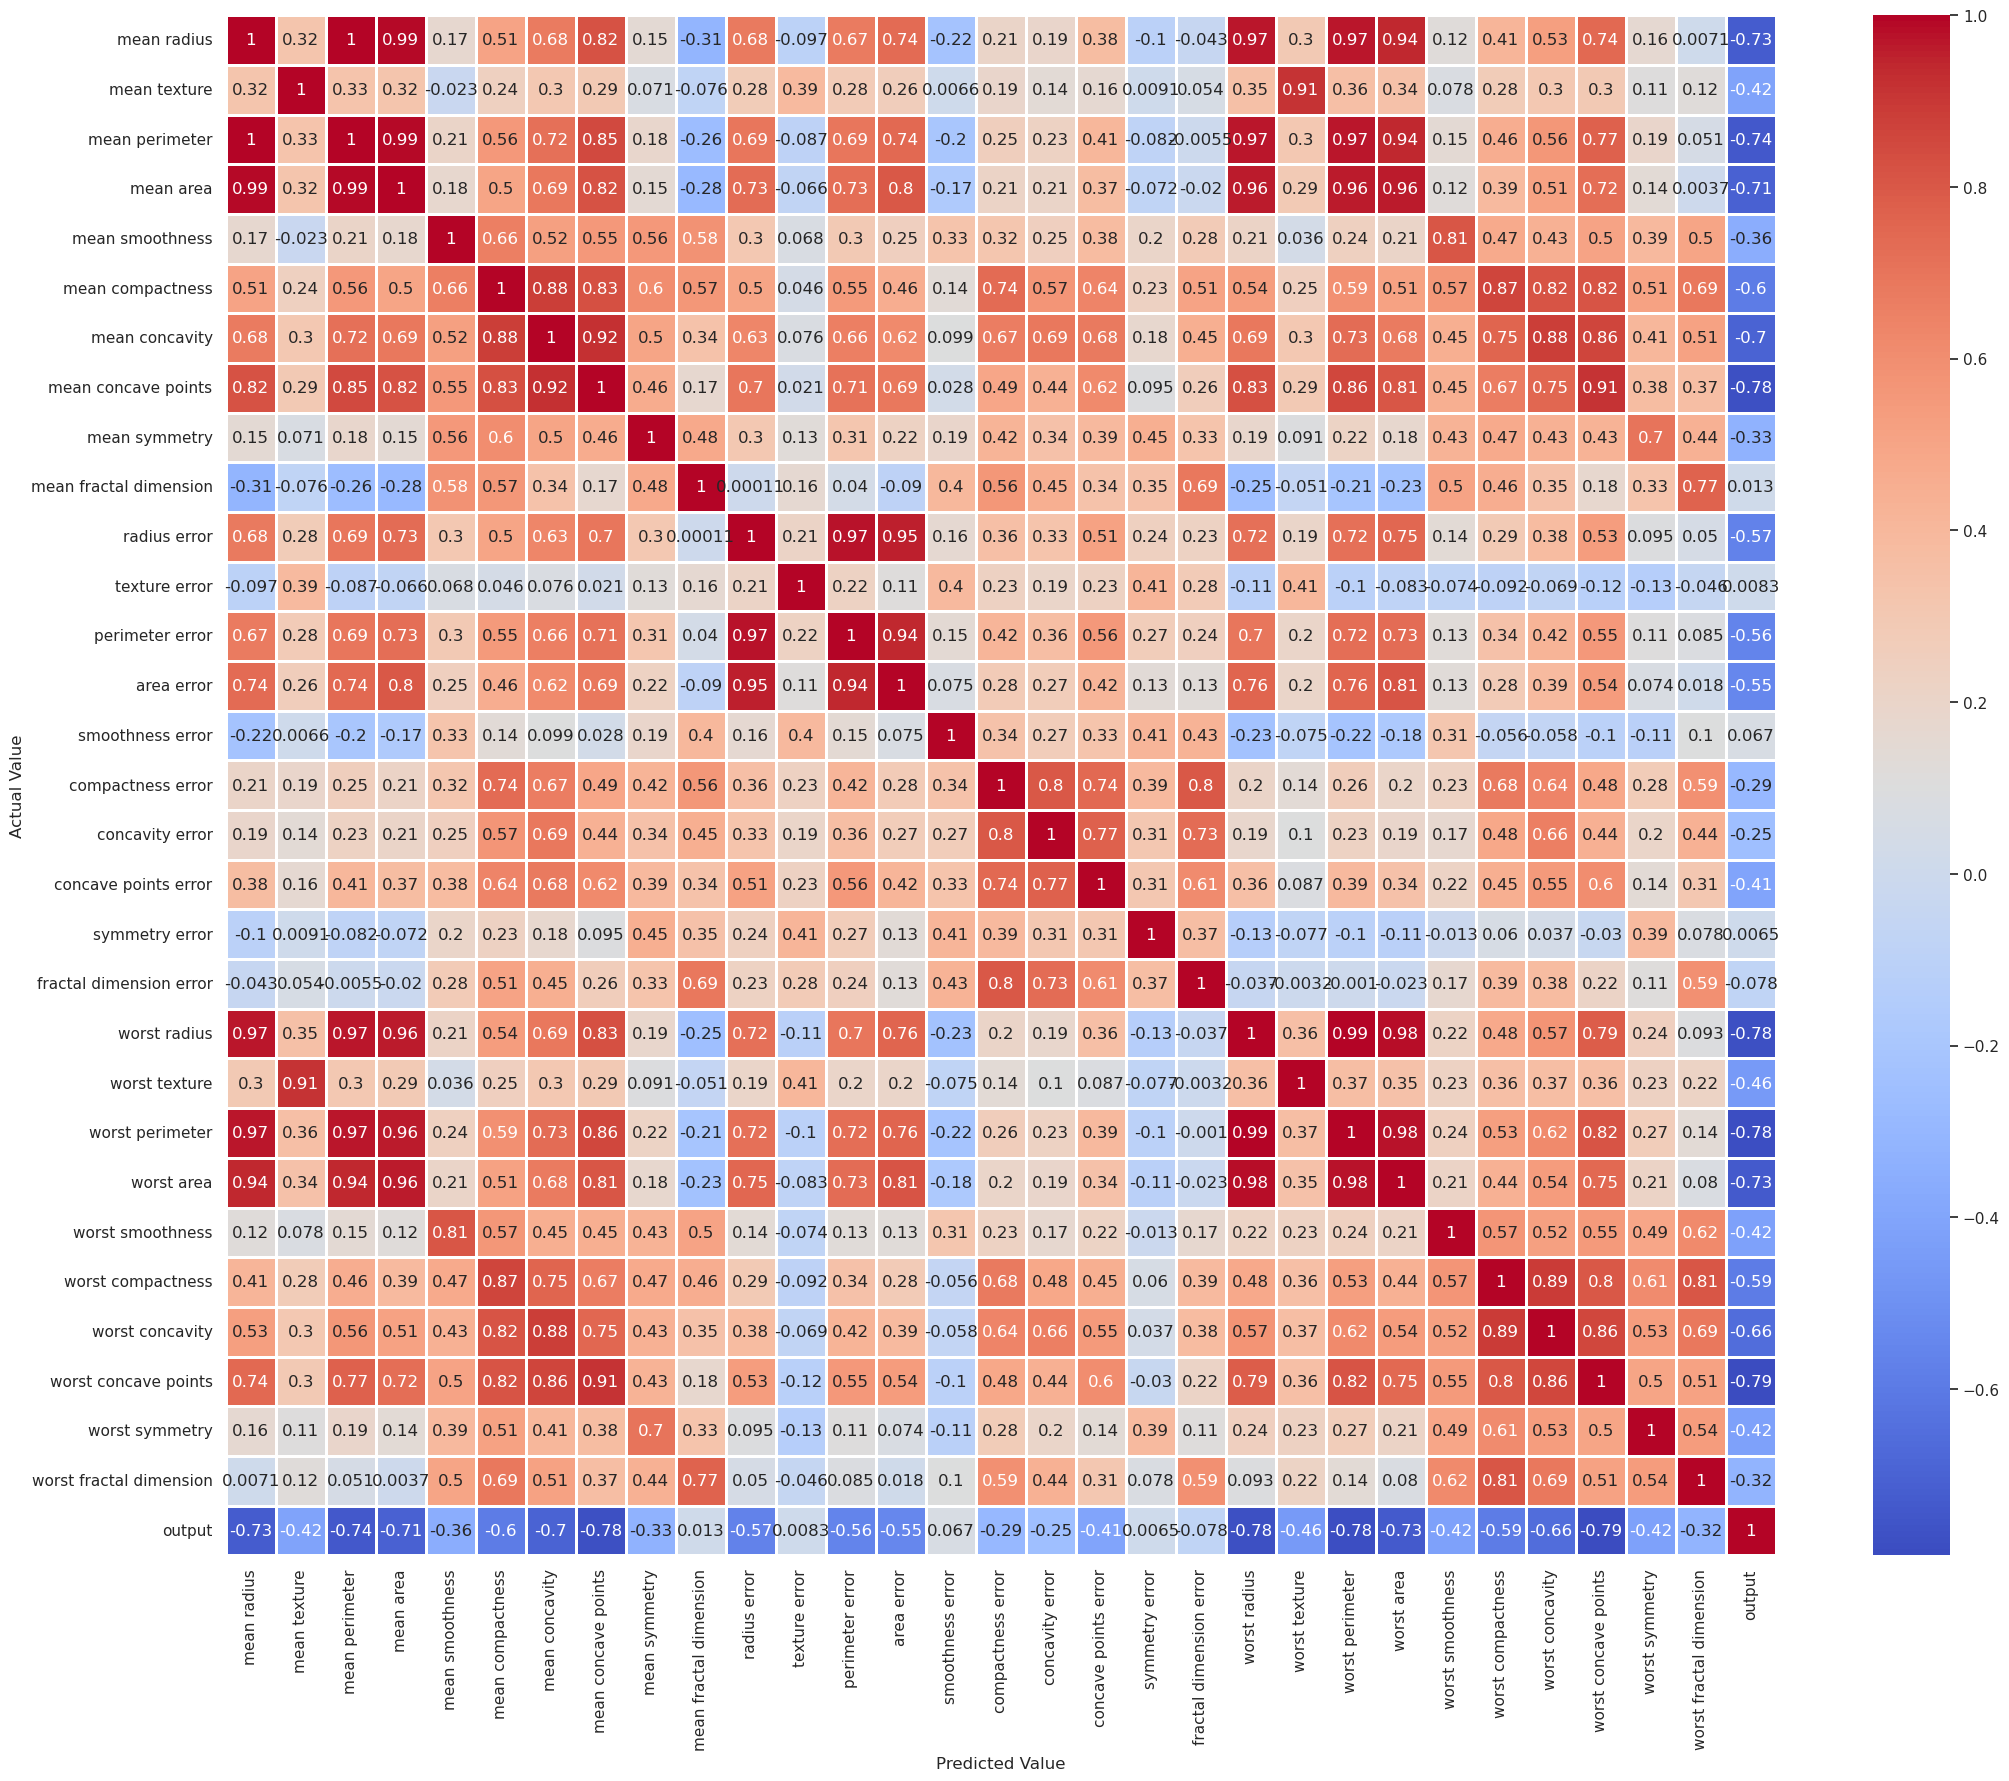

In [22]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=2,cmap='coolwarm')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

### Splitting the data

In [23]:
X = df.drop(['output'],axis='columns').values
y = df.output.values

### Scaling of data

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,stratify=y,random_state=42,test_size=0.3)

## Building the Neural Network (ANN)

### Importing required libraries for Model Building

In [26]:
import tensorflow as tf
from tensorflow import keras

2023-11-09 20:50:35.838268: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 20:50:35.901934: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 20:50:35.902735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-09 20:50:37.170374: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [27]:
# tensorflow - dl library - developed by google

In [28]:
# random seed - get same accuracy score (even though 'n' no of times network is used)
tf.random.set_seed(62)

In [29]:
print(X_train.shape,X_test.shape)

(398, 30) (171, 30)


In [30]:
# in Sequential, network layers are stacked

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(30,)), # layer 1 - in i/p paramater, total no. of feature is used
    keras.layers.Dense(20,activation='relu'),   # layer 2 - hidden layer 1, relu is generally used as an activation fun in hidden layer
    keras.layers.Dense(10,activation='relu'),   # layer 3 - hidden layer 2, relu is generally used as an activation fun in hidden layer
    keras.layers.Dense(2,activation='sigmoid')    # layer 4 - o/p layer, sigmoid is used as an activation function and there are only two classes , i.e. 2 is used
    
])


In [31]:
#Compiling Model

# target variable - 0,1,2,... => sparse_categorical_crossentropy
# target variable - one hot encoded data => [1,0,0][0,1,0][0,0,1] => categorical_crossentropy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [32]:

# training ANN

model_data = model.fit(X_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
12/12 [==============================] - 1s 27ms/step - loss: 0.6674 - accuracy: 0.6397 - val_loss: 0.6019 - val_accuracy: 0.6000
Epoch 2/10
12/12 [==============================] - 0s 7ms/step - loss: 0.5045 - accuracy: 0.7933 - val_loss: 0.4884 - val_accuracy: 0.9250
Epoch 3/10
12/12 [==============================] - 0s 7ms/step - loss: 0.4214 - accuracy: 0.8939 - val_loss: 0.4149 - val_accuracy: 0.9500
Epoch 4/10
12/12 [==============================] - 0s 7ms/step - loss: 0.3572 - accuracy: 0.9078 - val_loss: 0.3482 - val_accuracy: 0.9500
Epoch 5/10
12/12 [==============================] - 0s 9ms/step - loss: 0.3014 - accuracy: 0.9218 - val_loss: 0.2874 - val_accuracy: 0.9500
Epoch 6/10
12/12 [==============================] - 0s 10ms/step - loss: 0.2547 - accuracy: 0.9330 - val_loss: 0.2360 - val_accuracy: 0.9500
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 0.2166 - accuracy: 0.9497 - val_loss: 0.1961 - val_accuracy: 0.9750
Epoch 8/10
12/12 [

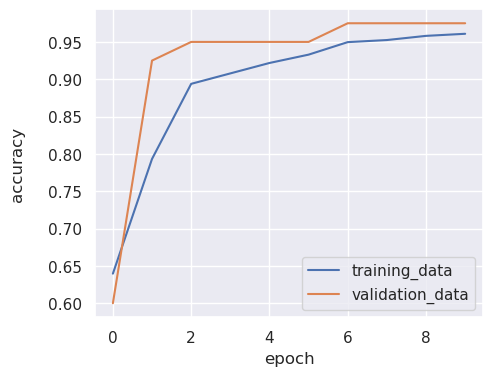

In [33]:

sns.set()

plt.figure(figsize=(5,4))

plt.plot(model_data.history['accuracy'])
plt.plot(model_data.history['val_accuracy'])

plt.legend(['training_data','validation_data'])
plt.xlabel('epoch')
plt.ylabel('accuracy\n')
plt.show()


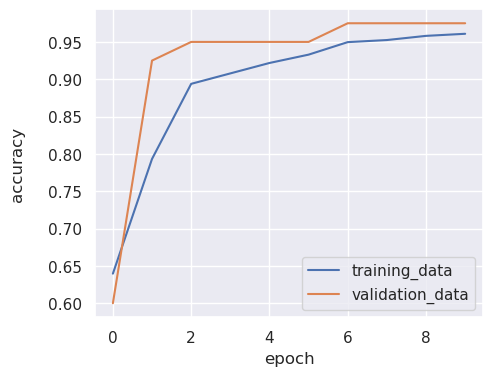

In [34]:

sns.set()

plt.figure(figsize=(5,4))

plt.plot(model_data.history['accuracy'])
plt.plot(model_data.history['val_accuracy'])

plt.legend(['training_data','validation_data'])
plt.xlabel('epoch')
plt.ylabel('accuracy\n')
plt.show()


In [35]:
# Accuracy of Model on test data

In [36]:
loss,accuracy = model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9591


In [37]:
print(f"Loss     : {loss} \nAccuracy : {accuracy}")

Loss     : 0.15066730976104736 
Accuracy : 0.9590643048286438


In [38]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [39]:
y_pred_label = [np.argmax(x) for x in y_pred]

In [40]:
y_pred_label[:5]

[0, 1, 1, 0, 1]

In [41]:
y_test[:5]

array([0, 1, 1, 0, 0])

In [42]:
matrix = confusion_matrix(y_test,y_pred_label)

In [43]:
print(classification_report(y_test,y_pred_label))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



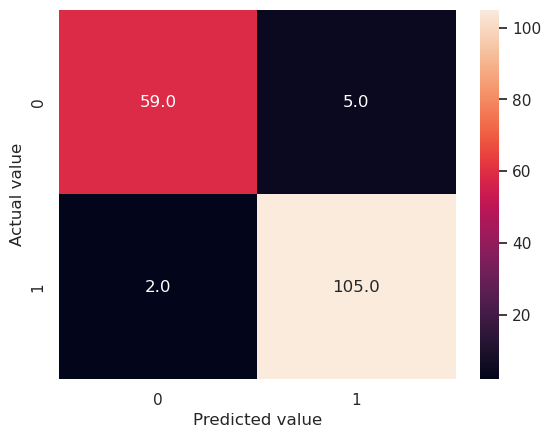

In [44]:
sns.heatmap(matrix,fmt=".1f",annot=True)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

## Building Predictive System

In [68]:
input_data = df.iloc[401]
input_data = input_data[:-1]

In [69]:
input_data = input_data.values
input_data

array([1.193e+01, 1.091e+01, 7.614e+01, 4.427e+02, 8.872e-02, 5.242e-02,
       2.606e-02, 1.796e-02, 1.601e-01, 5.541e-02, 2.522e-01, 1.045e+00,
       1.649e+00, 1.895e+01, 6.175e-03, 1.204e-02, 1.376e-02, 5.832e-03,
       1.096e-02, 1.857e-03, 1.380e+01, 2.014e+01, 8.764e+01, 5.895e+02,
       1.374e-01, 1.575e-01, 1.514e-01, 6.876e-02, 2.460e-01, 7.262e-02])

In [70]:
print(input_data.shape)
input_data = input_data.reshape(1,-1)
print(input_data.shape)

(30,)
(1, 30)


In [71]:
# Scaling input data
input_data_scaled = scaler.transform(input_data)

In [72]:
input_data_scaled

array([[-0.62406205, -1.95000046, -0.65200105, -0.60348758, -0.54372399,
        -0.98397946, -0.7876903 , -0.79855966, -0.76895669, -1.04727057,
        -0.55210828, -0.31180122, -0.60248157, -0.4705523 , -0.28867134,
        -0.75105139, -0.60126005, -0.96744068, -1.1602104 , -0.73301474,
        -0.51132607, -0.90170242, -0.58443427, -0.51169873,  0.22055617,
        -0.61556088, -0.57948559, -0.69808198, -0.71304604, -0.62762942]])

In [73]:
prediction = model.predict(input_data_scaled)

1/1 [==============================] - 0s 27ms/step


In [74]:
prediction

array([[0.15349633, 0.9629973 ]], dtype=float32)

In [75]:
prediction_label = np.argmax(prediction)

In [76]:
prediction_label

1

In [78]:
if prediction_label == 0:
    print("Breast Cancer is Malignant.")
elif prediction_label == 1:
    print("Breast Cancer is Benign.")

Breast Cancer is Benign.
